In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# first need to install: pip install html5lib
# TAGS
# pandas, map, lambda, concat data frames, groupby

In [2]:
# read data
df1 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=60103', header=0)[0]   
# Wrocław Gł.
df2 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=33605', header=0)[0]   
# Warszawa Centralna
df3 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=46409', header=0)[0]   
# Łódź Widzew
df4 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=30601', header=0)[0]   
# Poznań  Główny
df5 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=273', header=0)[0]     
# Szczecin Główny
df6 = pd.read_html('https://infopasazer.intercity.pl/?p=station&id=5900', header=0)[0]    
# Gdynia Główna

# concate data frames
frames = [df1,df2,df3,df4]
data = pd.concat(frames)

# remove polish fonts for better processing later
data=data.rename(columns = {'Opóźnienie':'Opoznienie'})

# remove "min" from "Opóźnienie"
data['Opoznienie'] = data['Opoznienie'].map(lambda x: float(x.rstrip(' min')))
# sort data
data = data.sort_values(by='Opoznienie', ascending=0)

print('Before removing duplicates: '+str(len(data.index)))
data = data.drop_duplicates(subset='Numer pociągu')
print('After removing duplicates: '+str(len(data.index)))

# print first 10 records
data[:10]

Before removing duplicates: 83
After removing duplicates: 80


,Numer pociągu,Przewoźnik,Data,Relacja,Przyjazd planowo,Opoznienie
3,45100/1 STOCZNIOWIEC,PKP Intercity,2017-05-15,Katowice - Gdynia Główna,17:27,12.0
17,71004/5 (45),PKP Intercity,2017-05-15,Frankfurt/Oder - Warszawa Wschodnia,18:06,8.0
19,16533/2 (6297),Przewozy Regionalne,2017-05-15,Łódź Kaliska - Wrocław Główny,18:51,7.0
4,3604/5 MEHOFFER,PKP Intercity,2017-05-15,Przemyśl - Jelenia Góra,17:39,6.0
20,41004/5 (130)VARSOVIA,PKP Intercity,2017-05-15,Petrovice U Karvine - Warszawa Wschodnia,18:23,4.0
12,61102/3 ORZESZKOWA,PKP Intercity,2017-05-15,Jelenia Góra - Białystok,19:01,4.0
11,3804/5 (55)MALCZEWSKI,PKP Intercity,2017-05-15,Przemyśl - Słupsk,17:56,3.0
0,82101/0 GAŁCZYŃSKI,PKP Intercity,2017-05-15,Szczecin Główny - Lublin,17:17,3.0
16,8409/8 (55)GWAREK,PKP Intercity,2017-05-15,Słupsk - Katowice,18:21,1.0
6,11321,Łódzka Kolej Aglomeracyjna,2017-05-15,Łowicz Główny - Łódź Widzew,18:08,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156c2128>]], dtype=object)

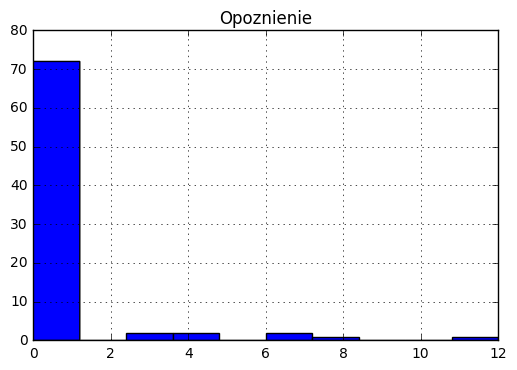

In [3]:
#data.plot.hist('Opoznienie')
pd.DataFrame.hist(data, 'Opoznienie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157b3198>]], dtype=object)

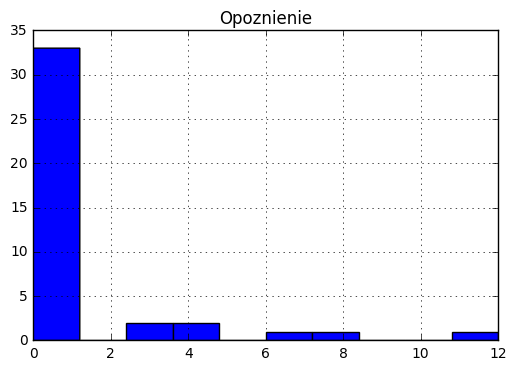

In [4]:
#data.loc[data['Przewoźnik'] == "PKP Intercity"]
#print(str(len(data.loc[data['Przewoźnik'] == "PKP Intercity"].index)))
pd.DataFrame.hist(data.loc[data['Przewoźnik'] == "PKP Intercity"], 'Opoznienie')

In [5]:
# operator -- liczba pociagow -- srednie opoznienie
data.groupby('Przewoźnik').agg(['mean', 'count'])

Opoznienie      
                                 mean count
Przewoźnik                                 
Koleje Dolnośląskie          0.000000     9
Koleje Mazowieckie           0.000000     4
Koleje Wielkopolskie         0.000000     5
PKP Intercity                1.025000    40
Przewozy Regionalne          0.411765    17
SKM Warszawa                 0.000000     2
Łódzka Kolej Aglomeracyjna   0.000000     3

# Pomysł

Najpierw można tworzyć histogram w czasie rzeczywistym pokazujący aktualne opóźnienia pociągów. Potem moża trenować sieć neuronową, która przewidywałaby opóźnienia danych pociągów na danej stacji.

Prawdopodobnie opóźnienia pociągów są nieliniowe, tzn., powiedzmy, 80% opóźnień powstaje dla 20% pociągów. Albo 80% opóźnień powstaje na 20% odcinków (Pareto).

# Dane

Warto byłoby mieć też ostateczne opóźnienie danego pociągu, tj. na stacji docelowej. Dane można zbierać cyklicznie. Ciekawe, czy PKP udostępniłoby dane historyczne.

# Komentarze

- Likwidacja duplikatów może generować błędy ponieważ niektóre pociągi z jakiegoś powodu wydają się zmieniać nazwę/numer już w trasie.
- Wykres: opóźnienie w f. dł. trasy?
- Średnie opóźnienie dla danego dworca -- lista najbardziej opóźnionych dworców.
- Id dworców wpisywałem ręcznie. Dałoby się zrobić pętlę i przeszukać wszystkie id (ok. 500 dworców w Polsce). Numeracja dworców zastosowana przez PKP jest dla mnie niejasna (zresztą jak numeracja miejsc w pociągach).
- Wizualizacja: węzły sieci -- stacje kolejowe, kolorowa skala oznaczająca (średnie) opóźnienie na danej stacji.